In [13]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(grid=False)

# set figure size
plt.rcParams["figure.figsize"] = (10,8)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

For this exercise you'll need to install a library that will provide us access to some more datasets:

pip install vega_datasets
You can use this library like so:

from vega_datasets import data
data.sf_temps()

In [4]:
from vega_datasets import data 
temp = data.sf_temps()
temp

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00
...,...,...
8754,50.40,2010-12-31 19:00:00
8755,49.90,2010-12-31 20:00:00
8756,49.40,2010-12-31 21:00:00
8757,48.80,2010-12-31 22:00:00


Use the above dataset for the exercises below:

### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [5]:
temp.date = pd.to_datetime(temp.date, format='%Y-%m-%d %I-%p')
temp.date

0      2010-01-01 00:00:00
1      2010-01-01 01:00:00
2      2010-01-01 02:00:00
3      2010-01-01 03:00:00
4      2010-01-01 04:00:00
               ...        
8754   2010-12-31 19:00:00
8755   2010-12-31 20:00:00
8756   2010-12-31 21:00:00
8757   2010-12-31 22:00:00
8758   2010-12-31 23:00:00
Name: date, Length: 8759, dtype: datetime64[ns]

In [6]:
temp = temp.set_index('date').sort_index()
temp.head()

,temp
date,
2010-01-01 00:00:00,47.80
2010-01-01 01:00:00,47.40
2010-01-01 02:00:00,46.90
2010-01-01 03:00:00,46.50
2010-01-01 04:00:00,46.00


In [7]:
temp.resample('D').mean()

,temp
date,
2010-01-01,49.17
2010-01-02,49.30
2010-01-03,49.39
2010-01-04,49.45
2010-01-05,49.49
...,...
2010-12-27,48.99
2010-12-28,49.00
2010-12-29,49.01


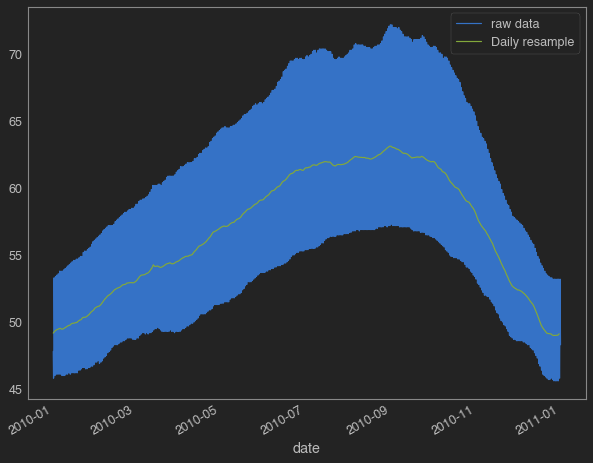

In [14]:
temp.temp.plot(label = 'raw data')
temp.resample('D').mean().temp.plot(label = 'Daily resample')
plt.legend();

### 2. Write the code necessary to visualize the minimum temperature over time.

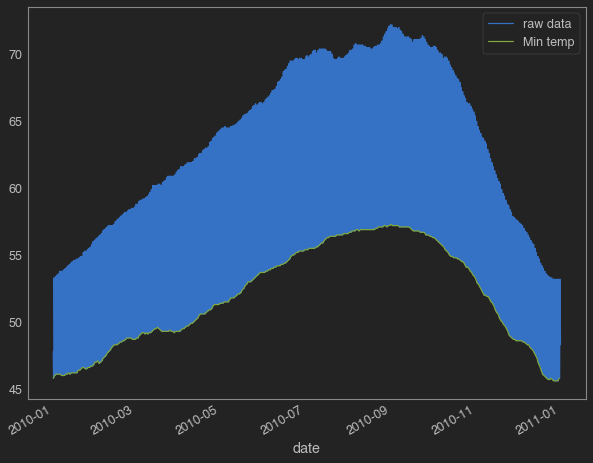

In [17]:
temp.temp.plot(label = 'raw data')
temp.resample('D').min().temp.plot(label = 'Min temp')
plt.legend();

### 3. Write the code necessary to visualize the maximum temperature over time.

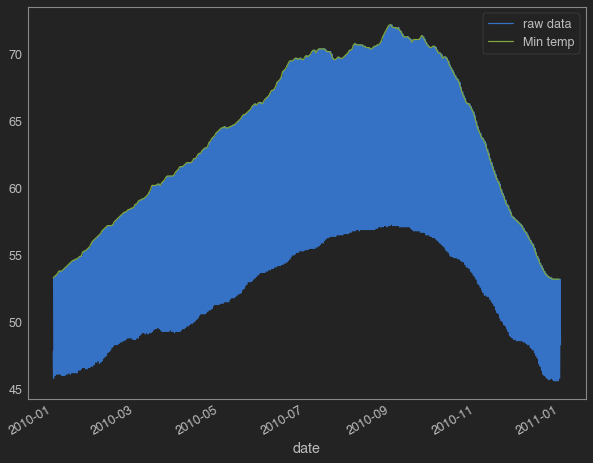

In [18]:
temp.temp.plot(label = 'raw data')
temp.resample('D').max().temp.plot(label = 'Min temp')
plt.legend();

### 4. Which month is the coldest, on average?

In [29]:
temp.resample('M').mean()
#Jan

,temp
date,
2010-01-31,49.98
2010-02-28,52.24
2010-03-31,53.96
2010-04-30,55.63
2010-05-31,57.97
2010-06-30,60.44
2010-07-31,61.77
2010-08-31,62.41
2010-09-30,62.49


### 5. Which month has the highest average temperature?

In [34]:
temp.resample('M').mean().max()
#Sept

temp   62.49
dtype: float64

### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [36]:
temp_daily = temp.resample('D').mean()
temp_daily.head(1)

,temp
date,
2010-01-01,49.17


In [37]:
temp_daily['max'] = temp.resample('D').max()
temp_daily.head()

,temp,max
date,,
2010-01-01,49.17,53.30
2010-01-02,49.30,53.40
2010-01-03,49.39,53.50
2010-01-04,49.45,53.60
2010-01-05,49.49,53.80


In [40]:
temp_daily['min'] = temp.resample('D').min()

In [41]:
temp_daily['delta'] = temp_daily['max'] - temp_daily['min']
temp_daily

,temp,max,min,delta
date,,,,
2010-01-01,49.17,53.30,45.80,7.50
2010-01-02,49.30,53.40,46.00,7.40
2010-01-03,49.39,53.50,46.10,7.40
2010-01-04,49.45,53.60,46.10,7.50
2010-01-05,49.49,53.80,46.10,7.70
...,...,...,...,...
2010-12-27,48.99,53.20,45.60,7.60
2010-12-28,49.00,53.20,45.60,7.60
2010-12-29,49.01,53.20,45.60,7.60


In [44]:
temp_daily.max()

temp    63.13
max     72.20
min     57.30
delta   15.00
dtype: float64

In [48]:
#largest daily delta August
temp_daily[temp_daily.delta == temp_daily.delta.max()]

,temp,max,min,delta
date,,,,
2010-08-31,63.13,72.20,57.20,15.00


In [49]:
#largest average delta Sept
temp_daily.resample('M').mean()

,temp,max,min,delta
date,,,,
2010-01-31,49.98,54.65,46.31,8.34
2010-02-28,52.24,57.55,48.06,9.49
2010-03-31,53.96,60.09,49.24,10.85
2010-04-30,55.63,62.65,50.33,12.32
2010-05-31,57.97,65.31,52.40,12.91
2010-06-30,60.44,68.43,54.48,13.95
2010-07-31,61.77,70.02,56.05,13.98
2010-08-31,62.41,70.81,56.94,13.87
2010-09-30,62.49,71.31,56.90,14.40


### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

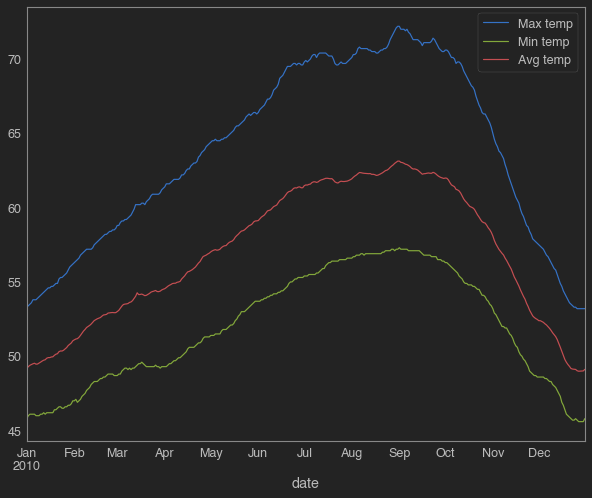

In [35]:
temp.resample('D').max().temp.plot(label = 'Max temp')
temp.resample('D').min().temp.plot(label = 'Min temp')
temp.resample('D').mean().temp.plot(label = 'Avg temp')
plt.legend()

In [52]:
seattle = data.seattle_weather()
seattle

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.00,12.80,5.00,4.70,drizzle
1,2012-01-02,10.90,10.60,2.80,4.50,rain
2,2012-01-03,0.80,11.70,7.20,2.30,rain
3,2012-01-04,20.30,12.20,5.60,4.70,rain
4,2012-01-05,1.30,8.90,2.80,6.10,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.60,4.40,1.70,2.90,fog
1457,2015-12-28,1.50,5.00,1.70,1.30,fog
1458,2015-12-29,0.00,7.20,0.60,2.60,fog
1459,2015-12-30,0.00,5.60,-1.00,3.40,sun


Use the dataset to answer the following questions:

### - Which year and month combination has the highest amount of precipitation?

In [57]:
seattle = seattle.set_index('date') 
seattle

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle
2012-01-02,10.90,10.60,2.80,4.50,rain
2012-01-03,0.80,11.70,7.20,2.30,rain
2012-01-04,20.30,12.20,5.60,4.70,rain
2012-01-05,1.30,8.90,2.80,6.10,rain
...,...,...,...,...,...
2015-12-27,8.60,4.40,1.70,2.90,fog
2015-12-28,1.50,5.00,1.70,1.30,fog
2015-12-29,0.00,7.20,0.60,2.60,fog


In [62]:
seattle_monthly_sum = seattle.resample('M').sum()
seattle_monthly_sum.describe()

,precipitation,temp_max,temp_min,wind
count,48.00,48.00,48.00,48.00
mean,92.21,500.36,250.65,98.65
std,69.80,204.60,136.02,14.44
min,0.00,189.30,24.70,70.50
25%,38.00,314.68,135.20,89.88
50%,81.65,464.45,219.35,96.30
75%,138.05,657.38,363.25,107.85
max,284.50,870.90,480.50,134.60


In [66]:
#Dec 2015
seattle_monthly_sum[seattle_monthly_sum.precipitation == seattle_monthly_sum.precipitation.max()]

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,284.50,259.80,118.60,134.60


### - Visualize the amount of monthly precipitation over time.

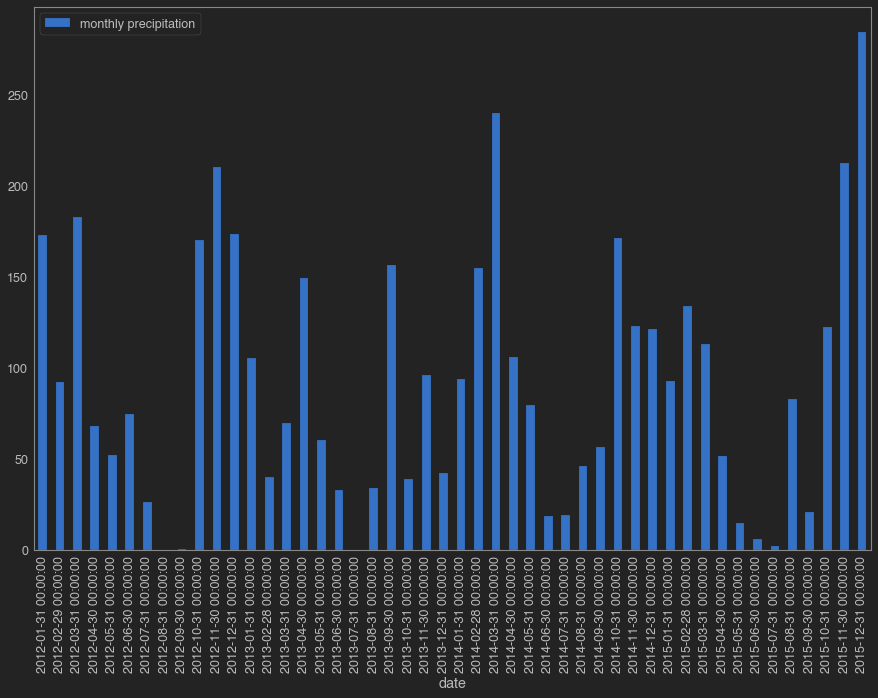

In [71]:
plt.figure(figsize=(15,10))
seattle_monthly_sum.precipitation.plot.bar(label = 'monthly precipitation')
plt.legend();

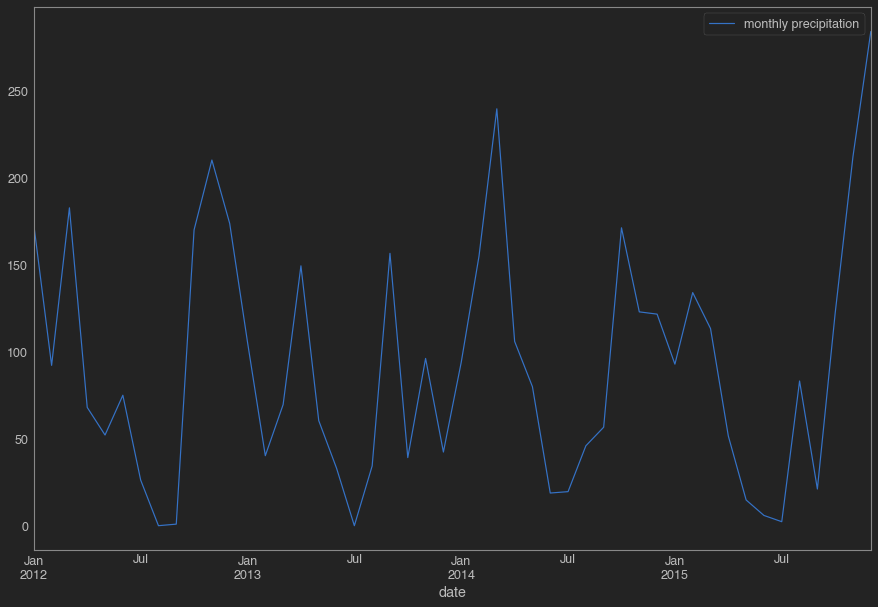

In [73]:
plt.figure(figsize=(15,10))
seattle_monthly_sum.precipitation.plot(label = 'monthly precipitation')
plt.legend();

### - Visualize the amount of wind over time. Choose a time interval you think is appropriate.

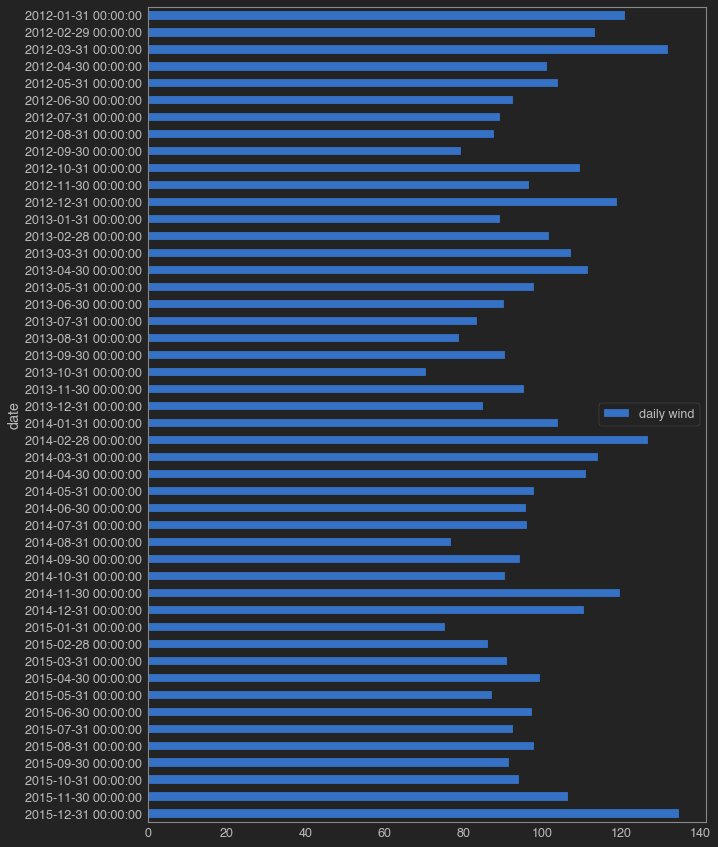

In [81]:
plt.figure(figsize=(10,15))
seattle_monthly_sum.wind.plot.barh(label = 'daily wind')
plt.gca().invert_yaxis()
plt.legend();

### - Which year-month combination is the windiest?

In [82]:
seattle_monthly_sum.max()

precipitation   284.50
temp_max        870.90
temp_min        480.50
wind            134.60
dtype: float64

In [83]:
#Dec 2015
seattle_monthly_sum[seattle_monthly_sum.wind == seattle_monthly_sum.wind.max()]

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,284.50,259.80,118.60,134.60


### - What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [85]:
sunny_seattle = seattle[seattle.weather == 'sun']
sunny_seattle

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-08,0.00,10.00,2.80,2.00,sun
2012-01-11,0.00,6.10,-1.10,5.10,sun
2012-01-12,0.00,6.10,-1.70,1.90,sun
2012-01-13,0.00,5.00,-2.80,1.30,sun
2012-02-02,0.00,8.30,1.70,2.60,sun
...,...,...,...,...,...
2015-12-13,1.30,7.80,6.10,6.10,sun
2015-12-14,0.00,7.80,1.70,1.70,sun
2015-12-26,0.00,4.40,0.00,2.50,sun


In [89]:
#2014
sunny_seattle.resample('Y').count()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-12-31,118,118,118,118,118
2013-12-31,205,205,205,205,205
2014-12-31,211,211,211,211,211
2015-12-31,180,180,180,180,180


### - In which month does it rain the most?

In [92]:
seattle_monthly_sum['Month'] = seattle_monthly_sum.index.month_name()
seattle_monthly_sum.head()

,precipitation,temp_max,temp_min,wind,Month
date,,,,,
2012-01-31,173.30,218.70,47.80,120.90,January
2012-02-29,92.30,269.00,92.90,113.20,February
2012-03-31,183.00,296.20,88.00,131.70,March
2012-04-30,68.10,446.20,179.80,101.20,April
2012-05-31,52.20,547.50,253.90,104.00,May


In [101]:
#November
seattle_monthly_sum.groupby('Month')[['precipitation']].sum().sort_values('precipitation', ascending=False)

,precipitation
Month,
November,642.50
December,622.70
March,606.20
October,503.40
January,466.00
February,422.00
April,375.40
September,235.50
May,207.50


### - Which month has the most number of days with a non-zero amount of precipitation?

In [103]:
rainy_seattle = seattle[seattle.precipitation != 0]
rainy_seattle

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-02,10.90,10.60,2.80,4.50,rain
2012-01-03,0.80,11.70,7.20,2.30,rain
2012-01-04,20.30,12.20,5.60,4.70,rain
2012-01-05,1.30,8.90,2.80,6.10,rain
2012-01-06,2.50,4.40,2.20,2.20,rain
...,...,...,...,...,...
2015-12-23,6.10,5.00,2.80,7.60,fog
2015-12-24,2.50,5.60,2.20,4.30,fog
2015-12-25,5.80,5.00,2.20,1.50,fog


In [105]:
rainy_seattle['Month'] = rainy_seattle.index.month_name()
rainy_seattle.head()

<ipython-input-105-c8f7d22657cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rainy_seattle['Month'] = rainy_seattle.index.month_name()


,precipitation,temp_max,temp_min,wind,weather,Month
date,,,,,,
2012-01-02,10.90,10.60,2.80,4.50,rain,January
2012-01-03,0.80,11.70,7.20,2.30,rain,January
2012-01-04,20.30,12.20,5.60,4.70,rain,January
2012-01-05,1.30,8.90,2.80,6.10,rain,January
2012-01-06,2.50,4.40,2.20,2.20,rain,January


In [106]:
#Dec
rainy_seattle.Month.value_counts()

December     81
March        73
February     73
November     71
January      66
October      61
April        59
June         37
September    35
May          34
August       22
July         11
Name: Month, dtype: int64

In [107]:
flights = data.flights_20k()
flights

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


### - Convert any negative delays to 0.

In [108]:
flights.delay = flights.delay.apply(lambda x: 0 if x < 0 else x)
flights.delay

0        32
1         0
2         3
3         0
4         0
         ..
19995     4
19996     0
19997     0
19998    42
19999     0
Name: delay, Length: 20000, dtype: int64

### - Which hour of the day has the highest average delay?

In [109]:
flights = flights.set_index('date')
flights.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,0,550,MSY,MCO
2001-03-30 21:45:00,0,229,STL,IND


In [120]:
flights_hourly = flights.resample('H').sum()
flights_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2158 entries, 2001-01-01 00:00:00 to 2001-03-31 21:00:00
Freq: H
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   delay     2158 non-null   int64
 1   distance  2158 non-null   int64
dtypes: int64(2)
memory usage: 50.6 KB


In [121]:
flights_hourly.fillna(0,inplace=True)
flights_hourly

,delay,distance
date,,
2001-01-01 00:00:00,14,405
2001-01-01 01:00:00,0,0
2001-01-01 02:00:00,0,0
2001-01-01 03:00:00,0,0
2001-01-01 04:00:00,0,0
...,...,...
2001-03-31 17:00:00,105,4616
2001-03-31 18:00:00,163,7390
2001-03-31 19:00:00,177,4211


In [125]:
flights_hourly['hour'] = flights_hourly.index.hour
flights_hourly['day'] = flights_hourly.index.day_name()
flights_hourly['month'] = flights_hourly.index.month_name()
flights_hourly.head()

,delay,distance,hour,day,month
date,,,,,
2001-01-01 00:00:00,14,405,0,Monday,January
2001-01-01 01:00:00,0,0,1,Monday,January
2001-01-01 02:00:00,0,0,2,Monday,January
2001-01-01 03:00:00,0,0,3,Monday,January
2001-01-01 04:00:00,0,0,4,Monday,January


In [128]:
# 8pm has highest avg delay
flights_hourly.groupby('hour')[['delay']].mean().sort_values(by='delay',ascending=False)

,delay
hour,
20,223.62
21,220.83
19,220.37
17,209.43
18,204.17
16,190.63
15,178.23
14,155.96
13,149.91


### - Does the day of the week make a difference in the delay amount?

In [129]:
#Yes Fridays have highest delay times
flights_hourly.groupby('day')[['delay']].sum().sort_values(by='delay',ascending=False)

,delay
day,
Friday,53770
Thursday,38605
Wednesday,33969
Tuesday,27715
Sunday,27221
Monday,21354
Saturday,19755


### - Does the month make a difference in the delay amount?

In [130]:
#Yes Feb has highest delay times
flights_hourly.groupby('month')[['delay']].sum().sort_values(by='delay',ascending=False)

,delay
month,
February,76987
January,76670
March,68732


Bonus

from vega_datasets import data
data.iowa_electricity()

- For each row, calculate the percentage of the year's total that energy source provided.
- Lineplot of generation over time, color by source
- Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)
- Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?
- Is the total generation increasing over time?
- How would you control for increasing consumption over time when considering how much energy is coming from each source?
- express each number as a % of the year's total

1. Use the sf_temps dataset
2. Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)
3. How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.
4. Create pretty labels for time plots
5. Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar
Explore the birdstrikes dataset.

Explore the birdstrikes dataset
df = data.birdstrikes()